<a href="https://colab.research.google.com/github/yeclairer/dacon_fashionMnist/blob/main/fashionMNIST_final_9458.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import *
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold

In [3]:
train = pd.read_csv("gdrive/MyDrive/fashionMNISTdata/train.csv").iloc[:, 1:]
test = pd.read_csv("gdrive/MyDrive/fashionMNISTdata/test.csv").iloc[:, 1:]
submission= pd.read_csv("gdrive/MyDrive/fashionMNISTdata/sample_submission.csv")

In [4]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
X = np.array(train.drop('label', axis = 1), dtype = 'float32')
y = train.label
target = np.array(test, dtype='float32')

In [6]:
X /= 255
target /= 255

In [7]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
X = X.reshape(-1, 28,28,1)
target = target.reshape(-1, 28,28,1)

In [9]:
np.random.seed(42)

In [10]:
skf = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = True)

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(X, 
                                                  y, 
                                                  test_size = 0.2, 
                                                  random_state=42)

In [12]:
earlyStopping = EarlyStopping(patience = 10, verbose=1, monitor = 'val_acc', mode = 'max') # 학습 조기 종료

In [13]:
sub_pred = np.zeros((test.shape[0], 10))

for i, (train_idx, val_idx) in enumerate(skf.split(X, y)) :
  print('====================================')
  print(f'{i + 1}번째 FOLD 학습')
    
  tr_x, tr_y = X[train_idx], y[train_idx] # 학습데이터
  val_x, val_y = X[val_idx], y[val_idx] # 검증데이터
  
  model = Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
  model.add(BatchNormalization())
  #model.add(Dropout(0.25))

  model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((3,3)))
  model.add(Dropout(0.3))

  model.add(Conv2D(128,(5,5),activation='relu',padding='same')) 
  model.add(BatchNormalization())
  model.add(MaxPooling2D((3,3)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(128,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Dense(32,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Dense(10,activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer = RMSprop(lr=0.003), metrics=['acc'])

  history = model.fit(X_train, Y_train, epochs = 100, 
                        validation_data = (X_val, Y_val), callbacks = [earlyStopping])
    
  pred = model.predict(target) / 5
  sub_pred += pred
  print(f'{i + 1}번째 폴드 종료\n')

1번째 FOLD 학습
Epoch 1/100
1500/1500 [==============================] - 65s 24ms/step - loss: 0.5227 - acc: 0.8209 - val_loss: 0.3399 - val_acc: 0.8746
Epoch 2/100
1500/1500 [==============================] - 28s 19ms/step - loss: 0.3513 - acc: 0.8800 - val_loss: 0.2486 - val_acc: 0.9138
Epoch 3/100
1500/1500 [==============================] - 25s 16ms/step - loss: 0.3087 - acc: 0.8970 - val_loss: 0.2603 - val_acc: 0.9067
Epoch 4/100
1500/1500 [==============================] - 26s 18ms/step - loss: 0.2839 - acc: 0.9038 - val_loss: 0.2338 - val_acc: 0.9154
Epoch 5/100
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2632 - acc: 0.9107 - val_loss: 0.2256 - val_acc: 0.9196
Epoch 6/100
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2503 - acc: 0.9159 - val_loss: 0.2423 - val_acc: 0.9135
Epoch 7/100
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2386 - acc: 0.9187 - val_loss: 0.2131 - val_acc: 0.9216
Epoch 8/100
1500/1500 [======

In [14]:
submission['label'] = [np.argmax(x) for x in sub_pred] # 각 클래스별 확률에서 제일 높은 확률의 클래스 할당

In [15]:
submission.to_csv('submission.csv', index = False)

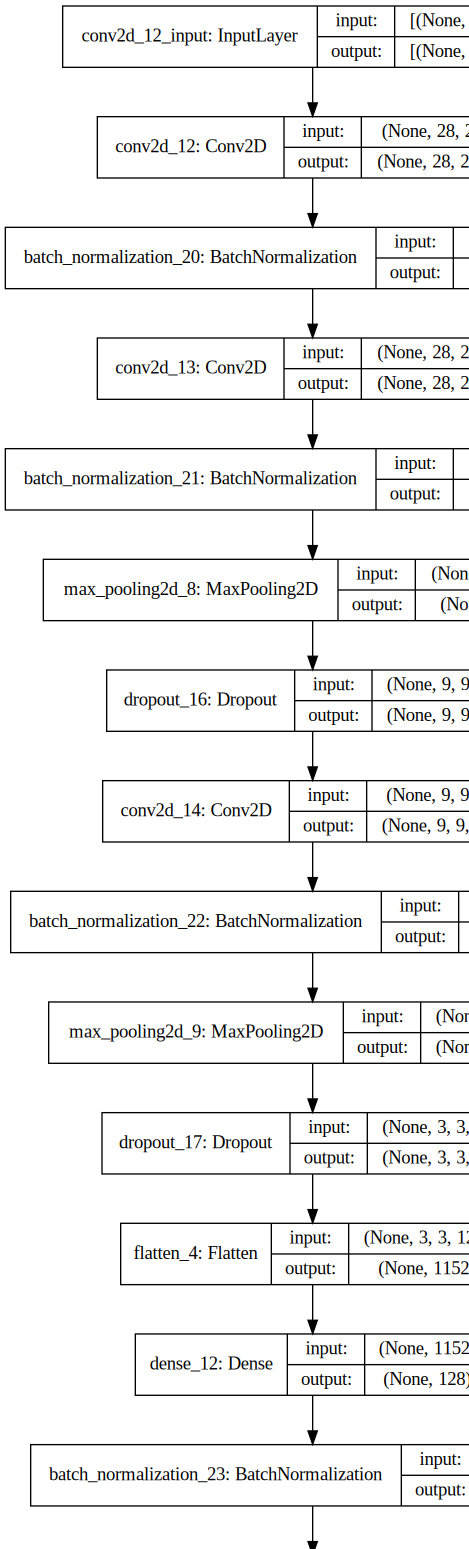

In [18]:
#모델 시각화
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

KeyError: ignored

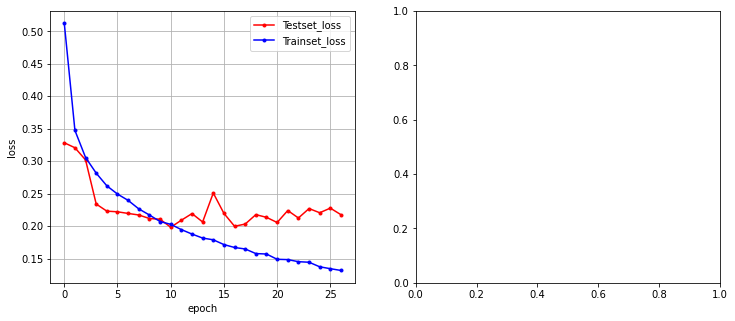

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
# 오차
y_vloss = history.history['val_loss']
# 학습셋 오차
y_loss = history.history['loss']
# 그래프로 표현
x_len = np.arange(len(y_loss))
ax1.plot(x_len, y_vloss, marker = '.', c="red", label='Testset_loss')
ax1.plot(x_len, y_loss, marker = '.', c='blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
ax1.legend(loc='upper right')
ax1.grid()
ax1.set(xlabel='epoch', ylabel='loss')

# 정확도
y_vaccuracy = history.history['val_accuracy']

# 학습셋
y_accuracy = history.history['accuracy']

# 그래프로 표현
x_len = np.arange(len(y_accuracy))
ax2.plot(x_len, y_vaccuracy, marker = '.', c="red", label='Testset_accuracy')
ax2.plot(x_len, y_accuracy, marker = '.', c='blue', label = 'Trainset_accuracy')

# 그래프에 그리드를 주고 레이블을 표시
ax2.legend(loc='lower right')
ax2.grid()

ax2.set(xlabel='epoch', ylabel='accuracy')

# draw gridlines
ax2.grid(True)
plt.show()

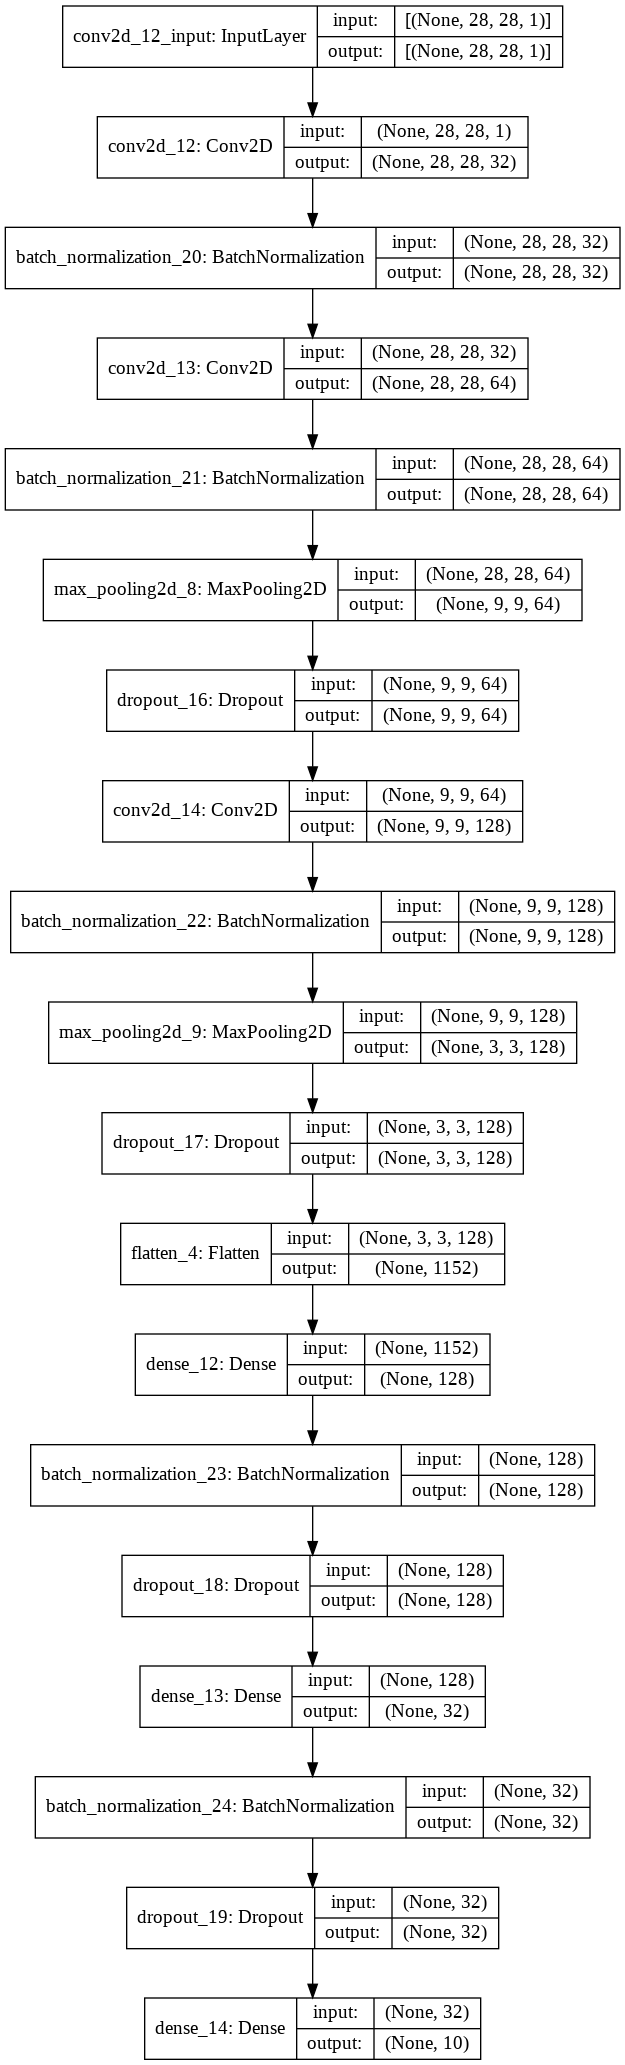

In [19]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png')
plot_model(model, to_file='model_shapes.png', show_shapes=True)